# Project Proposal
Jonathan Burns

Links Used

link : https://data.ny.gov/Energy-Environment/Environmental-Remediation-Sites/c6ci-rzpg/about_data
kaggle_link = "https://www.kaggle.com/datasets/jonathanburns22/environmental-remediation-sites?select=Environmental_Remediation_Sites_20240409.csv"

## **Research Question:**
- Across the national literature there is mounting evidence to suggest that toxic waste is more likely to be dumped and disposed of in targeted minority, low income areas and neighborhoods. Thus my research question is: Does New York State follow the national trend and just how bad are the chemicals that are being dumped? 

## **Justification - why is this relevant to you or your industry?**
- While I do not work in the industry, being a NY resident makes this as pertinent as ever. The communities we live in are all impacted by toxic waste dumping regardless of where you live. This is a dive into public health and health equity research that is not as regularly addressed as it needs to be.

In [1]:
## Libraries needed for pulling in data:
import pandas as pd
import os
import opendatasets as od

## **Data Sources: Pulling in the data**
* I needed to use kaggle and make my df public because GitHub capabilities were too small for this dataset.
* The info for getting this data, and the api pull is located below.
* Last thing of note, I am going to be looking for a poverty data set to pull into this project I found the poverty data on the census data tool, separating poverty estimates by zipcode in NYS.
* To give this data any meaning I had to pull in total population by zipcodes as well to calculate percentages, these will be joined, cleanded and then joined with the toxic waste dumping dataset
* I will eventually be trying to map this data

In [2]:
kaggle_link = "https://www.kaggle.com/datasets/jonathanburns22/environmental-remediation-sites?select=Environmental_Remediation_Sites_20240409.csv"
## user and key for install : {"username":"jonathanburns22","key":"90005dcc01f5eaeba4c00db91c8fafe3"}
od.download(kaggle_link)


Skipping, found downloaded files in ".\environmental-remediation-sites" (use force=True to force download)


In [6]:
pov_df = pd.read_csv("https://raw.githubusercontent.com/jonburns2454/DATA-602/main/census_poverty_data_zipcodes.csv")
pop_df = pd.read_csv("https://raw.githubusercontent.com/jonburns2454/DATA-602/main/ny-zip-codes-data.csv")
pop_df.head()

,zip,population,city,county
0,11368,112750,Corona,Queens County
1,11208,108180,Brooklyn,Kings County
2,11385,105521,Ridgewood,Queens County
3,11373,102618,Elmhurst,Queens County
4,11226,101053,Brooklyn,Kings County


In [7]:
pov_df.head()

,GEO_ID,NAME,Population for whom poverty status is determined,Population for whom poverty status is determined!!AGE!!Under 18 years,Population for whom poverty status is determined!!AGE!!Under 18 years!!Under 5 years,Population for whom poverty status is determined!!AGE!!Under 18 years!!5 to 17 years
0,860Z200US06390,ZCTA5 06390,53,6,0,6
1,860Z200US10001,ZCTA5 10001,25825,2675,744,1931
2,860Z200US10002,ZCTA5 10002,75806,10022,2141,7881
3,860Z200US10003,ZCTA5 10003,44602,3580,1404,2176
4,860Z200US10004,ZCTA5 10004,4578,839,432,407


In [3]:
data_dir = '.\\environmental-remediation-sites'
os.listdir(data_dir)

['Environmental_Remediation_Sites_20240409.csv']

In [5]:
df = pd.read_csv('environmental-remediation-sites/Environmental_Remediation_Sites_20240409.csv')
df.head()

C:\Users\Jonathan Burns\AppData\Local\Temp\ipykernel_21132\707603369.py:1: DtypeWarning: Columns (0,5,8,13,14,19,22,25,26,27,28,29,30,31,34,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('environmental-remediation-sites/Environmental_Remediation_Sites_20240409.csv')


,Program Number,Program Type,Program Facility Name,Site Class,Address1,Address2,Locality,County,ZIPCode,SWIS Code,...,Disposal City,Disposal ZIP,Disposal State,Operator Name,Operator Address1,Operator Address2,Operator City,Operator State,Operator Zip,Georeference
0,130069,HW,Roslyn Air National Guard Station,A,209 HARBOR HILL RD.,NaN,Roslyn,Nassau,11576,3022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.628608679 40.79635803)
1,130098,HW,Glen Head Groundwater Plume,N,Glen Head Road,NaN,Glen Head,Nassau,11545,3024,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.62667717 40.83397813)
2,130119,HW,Former Thypin Steel Plant,A,5 Sagamore Hill Drive,NaN,Manorhaven,Nassau,11050,3022,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.709502538 40.835351066)
3,152056,HW,Fire Island L.F.,N,152056 Fire Island L.F.,NaN,Fire Island Pines,Suffolk,11782,5222,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.31517273 40.76110161)
4,231075,RCRA,Ashland Inc,C,609 W 131st Street,NaN,New York,New York,10027,3101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.957496 40.818198)


## **Potential Libraries used**

In [8]:
## Libraries needed for pulling in data:
import pandas as pd
import os
import opendatasets as od

##Libraries for the rest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
#import folium possible mapping library

## **EDA and Summary Statistics**
* I plan on cutting and shaping this data set for the final project and most of the numeric data analysis will come with the introduction of poverty (by zipcode/county), thus a simple df.describe() will not provide much usable information since this data set is mostly classifying variables.

In [9]:
# 39 columns, however, only a subset of those will be important in the analysis
df.shape

(218923, 39)

In [10]:
## 1826 zipcodes across NYS, and 
pov_df.shape 
pop_df.shape
print(pov_df.shape,pop_df.shape)

(1826, 6) (1776, 4)


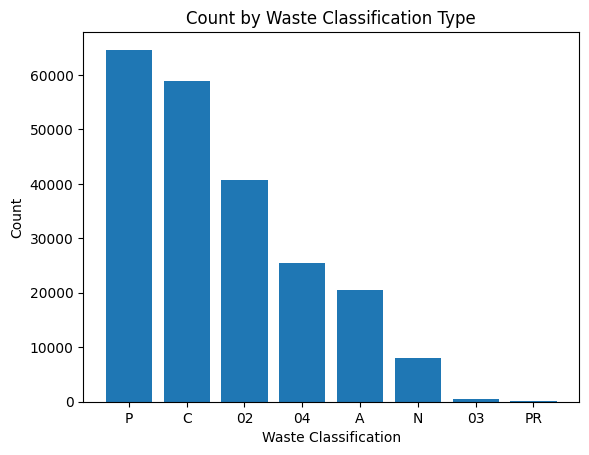

In [11]:
import matplotlib.pyplot as plt

# Assuming 'classification_column' is your classification column
class_counts = df['Site Class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Waste Classification')
plt.ylabel('Count')
plt.title('Count by Waste Classification Type')
plt.show()

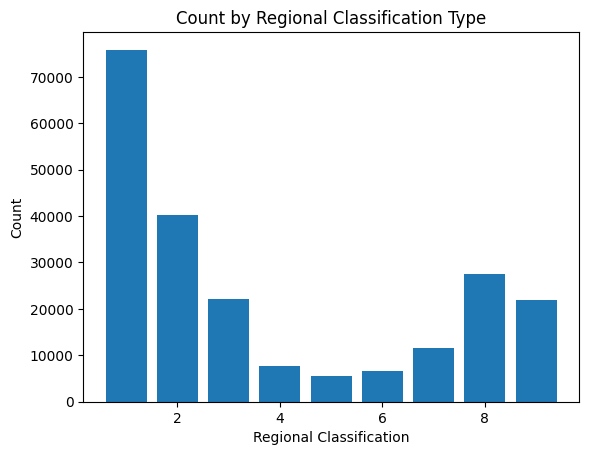

In [12]:
## The data is clustered in a few different regions, but I think more value will be derived from breaking it down by zip code rather than these massive DEC Regions
dec_counts = df['DEC Region'].value_counts()
plt.bar(dec_counts.index, dec_counts.values)
plt.xlabel('Regional Classification')
plt.ylabel('Count')
plt.title('Count by Regional Classification Type')
plt.show()

## **Conclusion**
This data requires a decent amount of cleaning, joining and formatting to get the correct contents and shape for cross-county data analysis and eventually mapping. I will be using Census Zip Code based poverty data and zip code based total population data (for poverty rate calculations). Finally I will use a mapping library to map out toxic dumping sites in NY to see if the national narrative holds true in NYS.